In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors

In [2]:
def logsigmoid(x):
    return x - np.log(1+np.exp(x))

In [3]:
def dlogsigmoid(x):
    return 1.0 / (1.0 + np.exp(x))

In [4]:
p = 0.9
q = 0.9
pi1 = p / (p+q)
pi0 = q / (p+q)

# Compute gradient
feature_w = np.arange(-4, 4, 0.4)
feature_e = np.arange(-4, 4, 0.4)
w, e = np.meshgrid(feature_w, feature_e)

b = 0.5*(e**2) + np.log((p-q + np.sqrt((p-q)**2 + 4*p*q*np.exp((1+2*w*np.abs(w))*(e**2))))/(2*q*np.exp((1+2*w*np.abs(w))*(e**2))))
f1 = (0.5+2*w*np.abs(w))*(e**2) + b
f0 = b - 0.5*(e**2)
Lw = -pi1*(-q*dlogsigmoid(-f1)+(1-q)*dlogsigmoid(f1))*4*np.abs(w)*(e**2)
Le = -pi1*(-q*dlogsigmoid(-f1)+(1-q)*dlogsigmoid(f1))*2*e*(0.5 + 2*w*np.abs(w)) -pi0*(-p*dlogsigmoid(f0)+(1-p)*dlogsigmoid(-f0))*e

%matplotlib inline
#%matplotlib qt
fig, ax = plt.subplots()
ax.grid()
ax.set_aspect(1)
ax.quiver(feature_w, feature_e, Lw, Le, angles='xy', units='width', scale=20, color='grey')

# Compute loss function
feature_w = np.arange(-4, 4, 0.01)
feature_e = np.arange(-4, 4, 0.01)
w, e = np.meshgrid(feature_w, feature_e)

b = 0.5*(e**2) + np.log((p-q + np.sqrt((p-q)**2 + 4*p*q*np.exp((1+2*w*np.abs(w))*(e**2))))/(2*q*np.exp((1+2*w*np.abs(w))*(e**2))))
f1 = (0.5+2*w*np.abs(w))*(e**2) + b
f0 = b - 0.5*(e**2)
L = -pi1 * (q*logsigmoid(-f1) + (1-q)*logsigmoid(f1)) - pi0 * (p*logsigmoid(f0) + (1-p)*logsigmoid(-f0))

# Compute global minima locus
sol = (1+2*w*np.abs(w))*(e**2)
val = np.log((1-p)*(1-q)/(p*q))

#ax.contour(w, e, L, [0.325, 0.5, 0.8, 1.0, 2, 4, 8, 10, 20, 40, 60], cmap='jet')
E = e**2 - w**2 - np.sign(w)*np.log(np.abs(w))
ax.contour(w, e, E, 30, cmap='jet')
ax.contour(w, e, sol, [val], colors='green')
#ax.plot(w2, fsol)

NameError: name 'p' is not defined

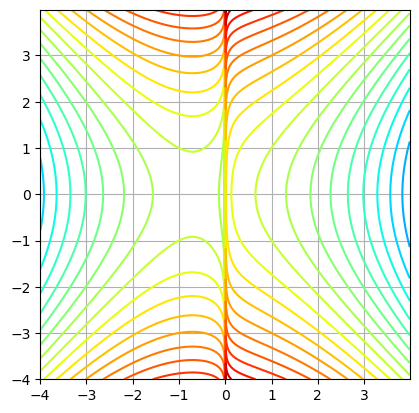

In [15]:
# Compute energy function
feature_w = np.arange(-4, 4, 0.01)
feature_e = np.arange(-4, 4, 0.01)
w, e = np.meshgrid(feature_w, feature_e)

E = e**2 - w**2 - np.sign(w)*np.log(np.abs(w))

%matplotlib inline
#%matplotlib qt
fig, ax = plt.subplots()
ax.grid()
ax.set_aspect(1)
ax.contour(w, e, E, 30, cmap='jet')

In [7]:
feature_w = np.arange(-2, 0, 0.01)
feature_e = np.arange(-2, 2, 0.01)
w, e = np.meshgrid(feature_w, feature_e)

# Compute loss function
b = 0.5*(e**2) + np.log((p-q + np.sqrt((p-q)**2 + 4*p*q*np.exp((1+2*w*np.abs(w))*(e**2))))/(2*q*np.exp((1+2*w*np.abs(w))*(e**2))))
f1 = (0.5+2*w*np.abs(w))*(e**2) + b
f0 = b - 0.5*(e**2)
L = -pi1 * (q*logsigmoid(-f1) + (1-q)*logsigmoid(f1)) - pi0 * (p*logsigmoid(f0) + (1-p)*logsigmoid(-f0))

# Compute global minima locus
sol = (1+2*w*np.abs(w))*(e**2)
val = np.log((1-p)*(1-q)/(p*q))

#%matplotlib inline
%matplotlib qt
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.plot_surface(w, e, L, cmap='plasma',vmin=0.6, vmax=1.5, alpha=0.9)
ax.contour(w, e, sol, [val], zdir='z', offset=0, colors='green')
ax.set(xlim=(-2, 0), ylim=(-2, 2), zlim=(0, 2))

[(-2.0, 0.0), (-2.0, 2.0), (0.0, 2.0)]